a)

In [1]:
# Veri setini yükle
data("USJudgeRatings", package = "datasets")

# Korelasyon matrisini hesapla
cor_matrix <- cor(USJudgeRatings)

# Korelasyon matrisini dataframe olarak dönüştür
cor_matrix_df <- as.data.frame(cor_matrix)

# Korelasyon matrisini yazdır
cor_matrix_df


,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CONT,1.00000000,-0.1331909,-0.1536885,0.0123920,0.1369123,0.08653823,0.01146921,-0.02563656,-0.01199681,-0.04381025,0.05424827,-0.03364343
INTG,-0.13319089,1.0000000,0.9646153,0.8715111,0.8140858,0.80284636,0.87779650,0.86885798,0.91139915,0.90883469,0.74193597,0.93726315
DMNR,-0.15368853,0.9646153,1.0000000,0.8368510,0.8133582,0.80411683,0.85581749,0.84124150,0.90677295,0.89306109,0.78868038,0.94370017
DILG,0.01239200,0.8715111,0.8368510,1.0000000,0.9587988,0.95616608,0.97856839,0.95736345,0.95447583,0.95925032,0.81292115,0.92996523
CFMG,0.13691230,0.8140858,0.8133582,0.9587988,1.0000000,0.98113590,0.95791402,0.93546838,0.95056567,0.94224697,0.87948744,0.92708271
DECI,0.08653823,0.8028464,0.8041168,0.9561661,0.9811359,1.00000000,0.95708831,0.94280452,0.94825640,0.94610093,0.87176277,0.92499241
PREP,0.01146921,0.8777965,0.8558175,0.9785684,0.9579140,0.95708831,1.00000000,0.98986345,0.98310045,0.98679918,0.84867350,0.95029259
FAMI,-0.02563656,0.8688580,0.8412415,0.9573634,0.9354684,0.94280452,0.98986345,1.00000000,0.98133905,0.99069557,0.84374436,0.94164495
ORAL,-0.01199681,0.9113992,0.9067729,0.9544758,0.9505657,0.94825640,0.98310045,0.98133905,1.00000000,0.99342943,0.89116392,0.98213227


# b)

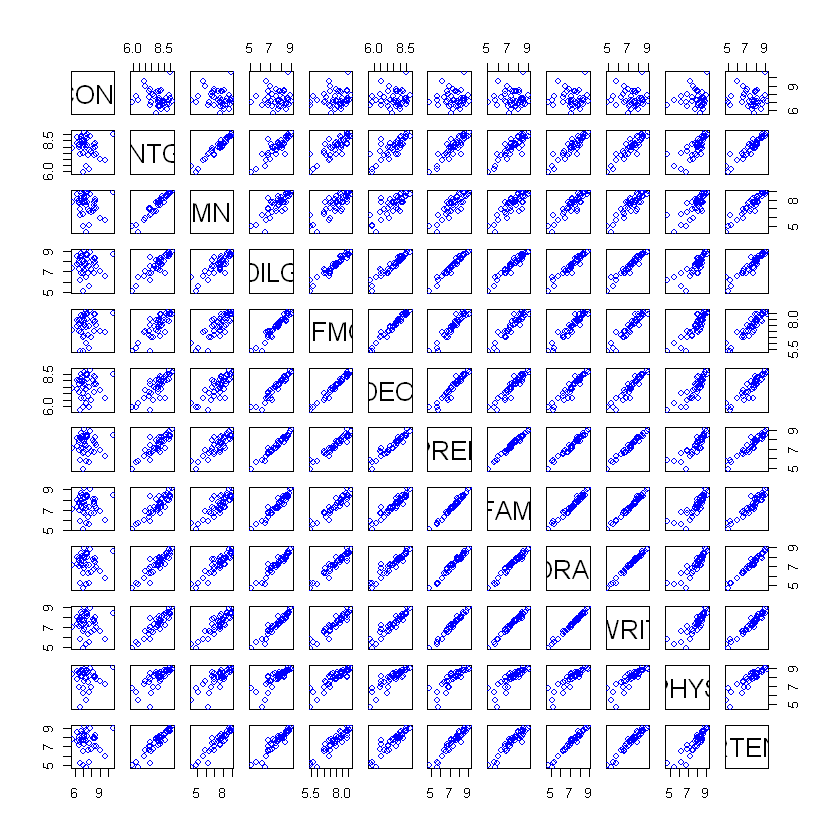

In [2]:

# pairs plot oluştur
# Yeni bir pencere aç ve grafiği çiz
windows(width = 1920, height = 1080)
pairs(USJudgeRatings, col = "blue", cex = 1)


In [3]:
# korelasyon: kovaryans : standartsapmaların çarpımı.
# değişken sayım 12 en fazla 12 tane temel bileşen yazabilirim
# varyansın %90 ını aciklayacak sekilde boyut indirgemesi yapabilirim.

png 
  2

png 
  2

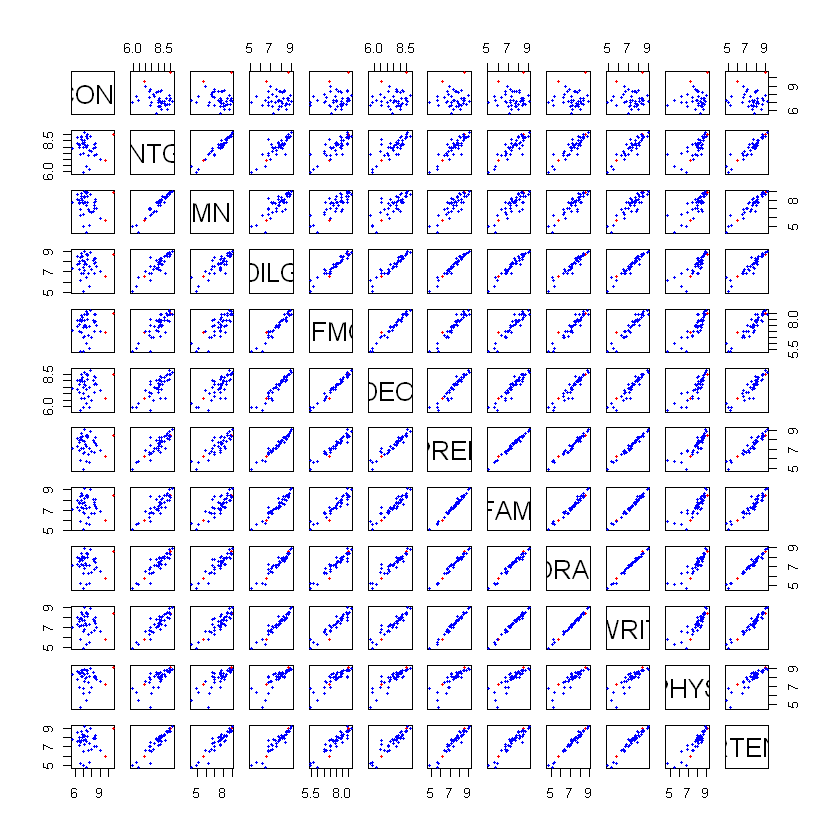

In [4]:
# Aykırı değerleri belirlemek için bir fonksiyon
identify_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR_val <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_val
  upper_bound <- Q3 + 1.5 * IQR_val
  return(ifelse(x < lower_bound | x > upper_bound, 1, 0))
}

# Grafik penceresini özelleştirerek 1920x1080 boyutunda bir pencere aç
windows(width = 12, height = 7)
par(mfrow = c(4, 3), mar = c(2, 2, 1, 1))  # 4x3 matris düzeni ve iç kenar boşlukları

# Çiftler plotunu oluştur
pairs(USJudgeRatings, pch = 16, col = ifelse(apply(USJudgeRatings, 2, identify_outliers), "red", "blue"), cex = 0.5)

# Grafik penceresini kapat
dev.off()

# Grafiği PNG formatında kaydet
png("outliers_plot.png", width = 1920, height = 1080, units = "px", res = 100)
pairs(USJudgeRatings, pch = 16, col = ifelse(apply(USJudgeRatings, 2, identify_outliers), "red", "blue"), cex = 0.5)
dev.off()


In [5]:
# Aykırı değerleri belirlemek için bir fonksiyon
identify_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR_val <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_val
  upper_bound <- Q3 + 1.5 * IQR_val
  return(sum(x < lower_bound | x > upper_bound))
}

# Her bir sütun için aykırı değer sayısını bul
outliers_counts <- apply(USJudgeRatings, 2, identify_outliers)

# Sonuçları ekrana yazdır
cat("Number of Outlier according to 1.5*IQR\n")

print(outliers_counts)

Number of Outlier according to 1.5*IQR
CONT INTG DMNR DILG CFMG DECI PREP FAMI ORAL WRIT PHYS RTEN 
   2    1    1    1    2    0    1    0    2    1    4    4 


 c) 

In [6]:
# c) kuresellik testi
kuresel_test = function(data, alfa = 0.05){
  n=nrow(data)
  p=ncol(data)
  
  cor_data=cor(data)
  
  test_ist=-(n-1-(2*p+5)/6)*log(abs(det(cor_data)))
  d_f_=1/2*p*(p-1)#serbestlik derecesi
  
  chi_table=qchisq(1-alfa,d_f_)
  
  if(test_ist>chi_table){
    karar=paste("Red. Kitle korelasyon matrisi birim matristen farklidir.TBA yapmak uygundur.")
  }else karar=paste("Reddedilemez. Kitle korelasyon matrisi birim matrisinden farkli degildir. TBA ugun degildir.")
  
  return(list(test_ist=test_ist,krtik_deger=chi_table,karar=karar))
}

In [7]:
kuresel_test(USJudgeRatings,.05)

$test_ist
[1] 1332.827

$krtik_deger
[1] 85.96491

$karar
[1] "Red. Kitle korelasyon matrisi birim matristen farklidir.TBA yapmak uygundur."

d)

In [8]:
#d)
means_vector <- colMeans(USJudgeRatings)
# means_dataframe <- data.frame(variable = names(means_vector), mean_value = means_vector)
# # Sadece mean_value sütununu içeren veri çerçevesini oluştur
means_dataframe <- data.frame(mean_value = means_vector)


means_dataframe

,mean_value
,<dbl>
CONT,7.437209
INTG,8.020930
DMNR,7.516279
DILG,7.693023
CFMG,7.479070
DECI,7.565116
PREP,7.467442
FAMI,7.488372
ORAL,7.293023


In [9]:
x_mean=sapply(USJudgeRatings,mean)

In [10]:
var_x = var(USJudgeRatings)
var_x

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
CONT,0.88524917,-0.09651163,-0.1653821,0.01050388,0.1107973,0.06537652,0.01028793,-0.02289037,-0.01140089,-0.03961794,0.04795681,-0.0348505
INTG,-0.09651163,0.59312292,0.8496512,0.60467331,0.5392580,0.49646179,0.64450720,0.63501107,0.70895903,0.67272979,0.53687154,0.7947121
DMNR,-0.16538206,0.84965116,1.3080620,0.86225914,0.8001107,0.73843854,0.93316168,0.91305094,1.04749723,0.98169989,0.84751384,1.1882946
DILG,0.01050388,0.60467331,0.8622591,0.81161683,0.7429457,0.69165559,0.84048173,0.81848837,0.86852159,0.83059801,0.68810631,0.9223976
CFMG,0.11079734,0.53925803,0.8001107,0.74294574,0.7397896,0.67758583,0.78549280,0.76356035,0.82580288,0.77893688,0.71074751,0.8779070
DECI,0.06537652,0.49646179,0.7384385,0.69165559,0.6775858,0.64470653,0.73264673,0.71839424,0.76903654,0.73013289,0.65767442,0.8177021
PREP,0.01028793,0.64450720,0.9331617,0.84048173,0.7854928,0.73264673,0.90891473,0.89556478,0.94667220,0.90421927,0.76021041,0.9974585
FAMI,-0.02289037,0.63501107,0.9130509,0.81848837,0.7635604,0.71839424,0.89556478,0.90057586,0.94063123,0.90361573,0.75232004,0.9838372
ORAL,-0.01140089,0.70895903,1.0474972,0.86852159,0.8258029,0.76903654,0.94667220,0.94063123,1.02018826,0.96440753,0.84572536,1.0921595
WRIT,-0.03961794,0.67272979,0.9816999,0.83059801,0.7789369,0.73013289,0.90421927,0.90361573,0.96440753,0.92377630,0.77296235,1.0238483


In [11]:
n=nrow(USJudgeRatings)
z=diag(1/sqrt((1-1/n)*diag(var_x)))%*%(t(USJudgeRatings)-x_mean)
z=t(z)

In [12]:
cor_z = cor(z)
cor_z

1.00000000,-0.1331909,-0.1536885,0.0123920,0.1369123,0.08653823,0.01146921,-0.02563656,-0.01199681,-0.04381025,0.05424827,-0.03364343
-0.13319089,1.0000000,0.9646153,0.8715111,0.8140858,0.80284636,0.87779650,0.86885798,0.91139915,0.90883469,0.74193597,0.93726315
-0.15368853,0.9646153,1.0000000,0.8368510,0.8133582,0.80411683,0.85581749,0.84124150,0.90677295,0.89306109,0.78868038,0.94370017
0.01239200,0.8715111,0.8368510,1.0000000,0.9587988,0.95616608,0.97856839,0.95736345,0.95447583,0.95925032,0.81292115,0.92996523
0.13691230,0.8140858,0.8133582,0.9587988,1.0000000,0.98113590,0.95791402,0.93546838,0.95056567,0.94224697,0.87948744,0.92708271
0.08653823,0.8028464,0.8041168,0.9561661,0.9811359,1.00000000,0.95708831,0.94280452,0.94825640,0.94610093,0.87176277,0.92499241
0.01146921,0.8777965,0.8558175,0.9785684,0.9579140,0.95708831,1.00000000,0.98986345,0.98310045,0.98679918,0.84867350,0.95029259
-0.02563656,0.8688580,0.8412415,0.9573634,0.9354684,0.94280452,0.98986345,1.00000000,0.98133905,0.99069557,0.84374436,0.94164495
-0.01199681,0.9113992,0.9067729,0.9544758,0.9505657,0.94825640,0.98310045,0.98133905,1.00000000,0.99342943,0.89116392,0.98213227
-0.04381025,0.9088347,0.8930611,0.9592503,0.9422470,0.94610093,0.98679918,0.99069557,0.99342943,1.00000000,0.85594002,0.96755639
0.05424827,0.7419360,0.7886804,0.8129211,0.8794874,0.87176277,0.84867350,0.84374436,0.89116392,0.85594002,1.00000000,0.90654782


In [13]:
z_eigen = eigen(cor_z)
z_eigen

eigen() decomposition
$values
 [1] 10.133503726  1.104146980  0.332901600  0.253847001  0.084452786
 [6]  0.037286058  0.019682813  0.015415288  0.007833472  0.005611727
[11]  0.003258175  0.002060374

$vectors
              [,1]         [,2]         [,3]         [,4]         [,5]
 [1,]  0.003075143  0.932890644 -0.334756548 -0.058576867 -0.093438368
 [2,] -0.288550775 -0.182040993 -0.549360126 -0.173977074  0.014543880
 [3,] -0.286884206 -0.197565743 -0.556490386  0.124412022  0.228832817
 [4,] -0.304354091  0.036304667  0.163629910 -0.321395544  0.301936920
 [5,] -0.302572733  0.168393523  0.207341904 -0.012949223  0.448430522
 [6,] -0.301891969  0.127877299  0.297902771 -0.030491779  0.424003128
 [7,] -0.309406446  0.032230248  0.151869345 -0.213656069 -0.202853400
 [8,] -0.306679527 -0.001315183  0.195290454 -0.200651140 -0.507470003
 [9,] -0.312708348 -0.003625720  0.002150634  0.007441042 -0.246059421
[10,] -0.311061231 -0.031378756  0.056045596 -0.137104995 -0.305562842
[11,] -0

In [14]:
z_eigen$values

[1] 10.133503726  1.104146980  0.332901600  0.253847001  0.084452786
 [6]  0.037286058  0.019682813  0.015415288  0.007833472  0.005611727
[11]  0.003258175  0.002060374

e)

In [15]:
z_eigen$vectors

0.003075143,0.932890644,-0.334756548,-0.058576867,-0.093438368,-0.004064432,0.005214784,-6.006597e-02,0.02514533,0.03038881,-0.0145329260,0.007940919
-0.288550775,-0.182040993,-0.549360126,-0.173977074,0.014543880,0.369937339,-0.449810741,3.341645e-01,0.27537794,-0.10897641,0.1125535650,-0.009848658
-0.286884206,-0.197565743,-0.556490386,0.124412022,0.228832817,-0.394724667,0.466747889,-2.470974e-01,0.19910004,0.07241282,-0.1343234234,-0.059121657
-0.304354091,0.036304667,0.163629910,-0.321395544,0.301936920,0.598676072,0.209710731,-3.548587e-01,-0.03977180,0.38339165,-0.0709517642,-0.053790339
-0.302572733,0.168393523,0.207341904,-0.012949223,0.448430522,-0.085728870,0.246903359,7.135261e-01,-0.14342471,-0.09850310,-0.1658680927,-0.025082947
-0.301891969,0.127877299,0.297902771,-0.030491779,0.424003128,-0.392609484,-0.536429933,-3.024227e-01,0.25823773,-0.06743847,0.1284999526,-0.044141604
-0.309406446,0.032230248,0.151869345,-0.213656069,-0.202853400,0.083216652,0.335390036,-1.536754e-01,0.10876864,-0.67986284,0.3187612119,0.273286884
-0.306679527,-0.001315183,0.195290454,-0.200651140,-0.507470003,-0.101538704,-0.036378004,2.038889e-02,0.22306628,-0.04004599,-0.5733628652,-0.421739844
-0.312708348,-0.003625720,0.002150634,0.007441042,-0.246059421,-0.150272440,0.057580177,9.062990e-02,-0.29951714,0.25599455,0.6386061655,-0.494391025
-0.311061231,-0.031378756,0.056045596,-0.137104995,-0.305562842,-0.238172386,-0.060899994,1.261203e-01,-0.02497324,0.47478254,-0.0004056397,0.696107204
-0.280723624,0.089037698,0.154000444,0.841266046,-0.118424976,0.299281534,0.024959951,-1.364511e-05,0.26627286,0.05900837,0.0181381019,0.053783960


In [16]:
z_eigen$values/sum(z_eigen$values)

[1] 0.8444586439 0.0920122483 0.0277418000 0.0211539167 0.0070377322
 [6] 0.0031071715 0.0016402344 0.0012846073 0.0006527893 0.0004676439
[11] 0.0002715146 0.0001716978

In [17]:
sum(z_eigen$values)

[1] 12

In [18]:
0.844458643863141+0.0920122483152882

[1] 0.9364709

In [28]:
x_pca=princomp(USJudgeRatings,cor=TRUE) # corr= FALSE, kolerasyon uzerinden pca yapiyoruz.
summary(x_pca)

Importance of components:
                          Comp.1     Comp.2    Comp.3     Comp.4      Comp.5
Standard deviation     3.1833165 1.05078398 0.5769763 0.50383231 0.290607615
Proportion of Variance 0.8444586 0.09201225 0.0277418 0.02115392 0.007037732
Cumulative Proportion  0.8444586 0.93647089 0.9642127 0.98536661 0.992404341
                            Comp.6      Comp.7      Comp.8       Comp.9
Standard deviation     0.193095982 0.140295449 0.124158319 0.0885069038
Proportion of Variance 0.003107172 0.001640234 0.001284607 0.0006527893
Cumulative Proportion  0.995511513 0.997151747 0.998436354 0.9990891437
                            Comp.10      Comp.11      Comp.12
Standard deviation     0.0749114592 0.0570804224 0.0453913429
Proportion of Variance 0.0004676439 0.0002715146 0.0001716978
Cumulative Proportion  0.9995567876 0.9998283022 1.0000000000

In [29]:
# Özvektör matrisini alalım
ozvektor_matrisi <- x_pca$loading

# Gözlem değerlerini alalım (veri setinizin transpozu olabilir)
gozlem_degerleri <- t(USJudgeRatings)

# Temel bileşenleri bulalım
temel_bilesenler <- ozvektor_matrisi %*% gozlem_degerleri

# temel_bilesenler matrisinde her bir sütun, bir temel bileşeni temsil eder
t(temel_bilesenler)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
"AARONSON,L.H.",12.123400,-5.808445,9.119545,-0.356589808,-8.285623,-4.597814,-1.322745,4.926722,-8.748866,9.731673,-6.847761,-6.681935
"ALEXANDER,J.M.",13.680207,-6.406227,10.006034,-0.288718248,-9.514899,-5.271058,-1.371159,4.844449,-9.412019,10.709700,-8.066286,-7.770024
"ARMENTANO,A.J.",12.453026,-6.472644,8.931155,-0.559185858,-9.203371,-5.148231,-1.551330,4.547075,-8.809394,9.601561,-7.605456,-7.613252
"BERDON,R.I.",13.635786,-7.138593,10.567890,0.085376054,-10.077607,-5.328161,-1.292523,5.499797,-9.470935,11.157926,-8.134661,-8.426849
"BRACKEN,J.J.",9.178431,-6.467383,5.222962,-0.948159497,-7.218932,-3.870904,-1.317780,3.622633,-6.200105,6.155175,-6.783379,-6.576656
"BURNS,E.B.",13.569783,-6.245363,10.192997,0.000130736,-9.377626,-5.171757,-1.216842,5.225191,-9.257205,10.878641,-7.795126,-7.774594
"CALLAHAN,R.J.",13.976458,-7.886009,9.539857,-1.375946437,-11.250897,-6.603385,-2.525079,4.442923,-11.029648,10.188487,-9.084339,-9.532618
"COHEN,S.S.",8.730161,-5.693563,5.420623,-1.519995911,-6.598266,-3.879951,-2.253411,3.615054,-7.197171,5.874126,-5.804987,-5.208067
"DALY,J.J.",13.867899,-6.868881,10.351013,-0.426092972,-10.293336,-5.649942,-1.584651,5.375242,-9.593474,11.180515,-8.210179,-8.477629
"DANNEHY,J.F.",12.027718,-7.813061,8.618922,-0.483195056,-9.781856,-5.189728,-1.754179,5.107544,-9.444069,9.766797,-7.924709,-8.365218


In [30]:
# x_pca, önceki temel bileşen analizini yaptığımız nesnedir
# "USJudgeRatings" veri seti üzerinde yapılan temel bileşen analizini kullanıyoruz
x_pca_scores <- predict(x_pca)

# Elde edilen temel bileşen skorlarını yazdıralım
x_pca_scores


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
"AARONSON,L.H.",0.59268305,-1.834557041,-0.261552651,-0.895893298,-0.20044763,0.0005825718,-0.092460026,0.136869947,-0.130097522,-0.120753799,-0.011042657,-0.0605750422
"ALEXANDER,J.M.",-2.40817832,-0.878164524,0.466451268,-0.060627078,-0.30809274,-0.2318134041,-0.148673241,0.294121028,0.027201519,-0.033878552,0.138399204,-0.0065738108
"ARMENTANO,A.J.",-0.22780349,-0.302316250,0.102041924,0.022480649,-0.13171447,0.0152455474,0.039810364,0.092830169,-0.068216131,-0.021907451,0.069464878,-0.0016589512
"BERDON,R.I.",-3.66071616,-0.596342199,-0.425710060,0.199642960,0.08395019,-0.0833295018,-0.041738218,0.089572260,0.108101049,-0.063679282,-0.024095089,0.0034587868
"BRACKEN,J.J.",6.95244952,0.137356050,-0.966756888,1.081803886,-0.30430933,-0.3706306946,-0.117053003,-0.098372813,0.035352478,0.031959813,-0.088326017,-0.1174078812
"BURNS,E.B.",-2.47442074,-1.422422886,0.087268557,-0.150640628,-0.23041761,-0.2427043859,0.029365082,0.119885849,-0.045130741,0.009776224,-0.022297354,-0.0009124106
"CALLAHAN,R.J.",-3.93743704,3.147711145,1.330437754,-0.018986318,0.21536668,-0.0424359746,-0.046969648,0.154829984,0.073823218,0.095573406,-0.025425152,-0.0883646722
"COHEN,S.S.",8.09307094,-0.271058974,-0.513340689,-1.242266773,-0.07344448,0.2414125084,-0.183380242,0.060647219,0.135842592,0.033538920,0.092651906,-0.0221243346
"DALY,J.J.",-3.70295623,-0.146659161,0.095310225,0.029303488,-0.29933971,0.0981296619,0.012028544,-0.148325408,0.006603712,0.092450959,0.011367642,0.0379660914
"DANNEHY,J.F.",-1.06028925,1.149046170,-0.824219549,0.003899651,0.38398227,-0.2373465439,-0.265043930,-0.075857532,-0.097141016,0.021202192,0.011407217,-0.0018038959


In [31]:
# Gerekli paketi yükleyelim
# install.packages("openxlsx")
library(openxlsx)

# x_pca, önceki temel bileşen analizini yaptığımız nesnedir
# "USJudgeRatings" veri seti üzerinde yapılan temel bileşen analizini kullanıyoruz
x_pca_scores <- predict(x_pca)

# Elde edilen temel bileşen skorlarını bir veri çerçevesine dönüştürelim
df_scores <- as.data.frame(x_pca_scores)

# Veri çerçevesini bir Excel dosyasına kaydedelim
write.xlsx(df_scores, "temel_bilesen_skorlari.xlsx", rowNames = TRUE)

# Kaydedilen Excel dosyasını inceleyebilirsiniz


Warning message in file.create(to[okay]):
"dosya 'temel_bilesen_skorlari.xlsx' oluşturulamıyor, sebep: 'Permission denied'"


f)

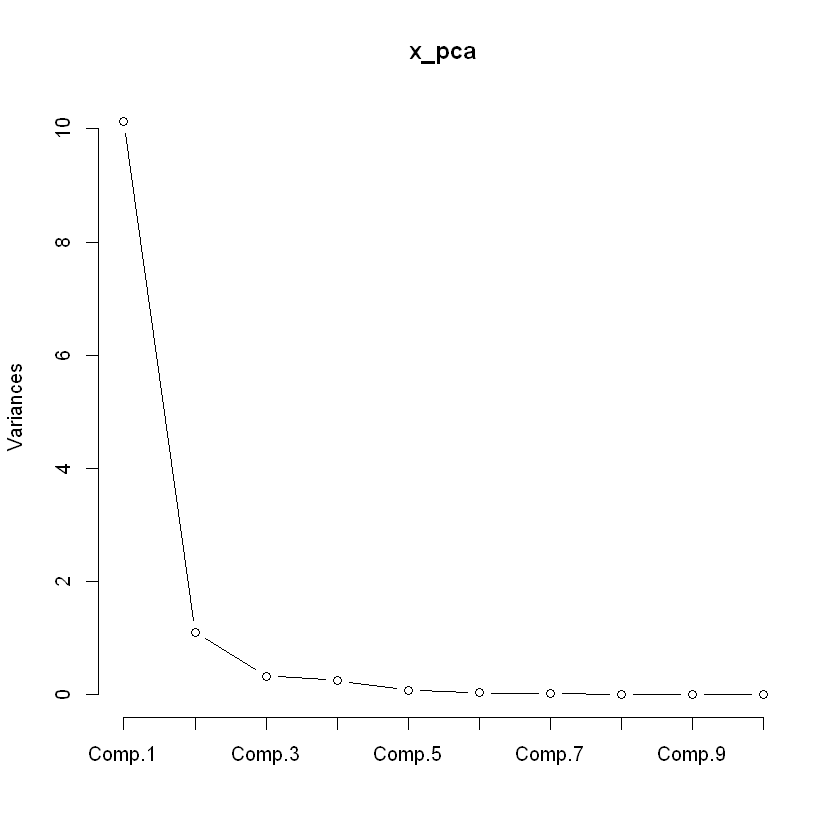

In [32]:
screeplot(x_pca,type="l")

In [33]:
Y1=t(z_eigen$vectors[,1])%*%t(z)
Y2=t(z_eigen$vectors[,2])%*%t(z)

In [34]:
cbind(cbind(t(Y1),t(Y2)),x_pca$scores)

,,,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
"AARONSON,L.H.",0.59268305,-1.834557041,0.59268305,-1.834557041,-0.261552651,-0.895893298,-0.20044763,0.0005825718,-0.092460026,0.136869947,-0.130097522,-0.120753799,-0.011042657,-0.0605750422
"ALEXANDER,J.M.",-2.40817832,-0.878164524,-2.40817832,-0.878164524,0.466451268,-0.060627078,-0.30809274,-0.2318134041,-0.148673241,0.294121028,0.027201519,-0.033878552,0.138399204,-0.0065738108
"ARMENTANO,A.J.",-0.22780349,-0.302316250,-0.22780349,-0.302316250,0.102041924,0.022480649,-0.13171447,0.0152455474,0.039810364,0.092830169,-0.068216131,-0.021907451,0.069464878,-0.0016589512
"BERDON,R.I.",-3.66071616,-0.596342199,-3.66071616,-0.596342199,-0.425710060,0.199642960,0.08395019,-0.0833295018,-0.041738218,0.089572260,0.108101049,-0.063679282,-0.024095089,0.0034587868
"BRACKEN,J.J.",6.95244952,0.137356050,6.95244952,0.137356050,-0.966756888,1.081803886,-0.30430933,-0.3706306946,-0.117053003,-0.098372813,0.035352478,0.031959813,-0.088326017,-0.1174078812
"BURNS,E.B.",-2.47442074,-1.422422886,-2.47442074,-1.422422886,0.087268557,-0.150640628,-0.23041761,-0.2427043859,0.029365082,0.119885849,-0.045130741,0.009776224,-0.022297354,-0.0009124106
"CALLAHAN,R.J.",-3.93743704,3.147711145,-3.93743704,3.147711145,1.330437754,-0.018986318,0.21536668,-0.0424359746,-0.046969648,0.154829984,0.073823218,0.095573406,-0.025425152,-0.0883646722
"COHEN,S.S.",8.09307094,-0.271058974,8.09307094,-0.271058974,-0.513340689,-1.242266773,-0.07344448,0.2414125084,-0.183380242,0.060647219,0.135842592,0.033538920,0.092651906,-0.0221243346
"DALY,J.J.",-3.70295623,-0.146659161,-3.70295623,-0.146659161,0.095310225,0.029303488,-0.29933971,0.0981296619,0.012028544,-0.148325408,0.006603712,0.092450959,0.011367642,0.0379660914
"DANNEHY,J.F.",-1.06028925,1.149046170,-1.06028925,1.149046170,-0.824219549,0.003899651,0.38398227,-0.2373465439,-0.265043930,-0.075857532,-0.097141016,0.021202192,0.011407217,-0.0018038959


g)

png 
  2

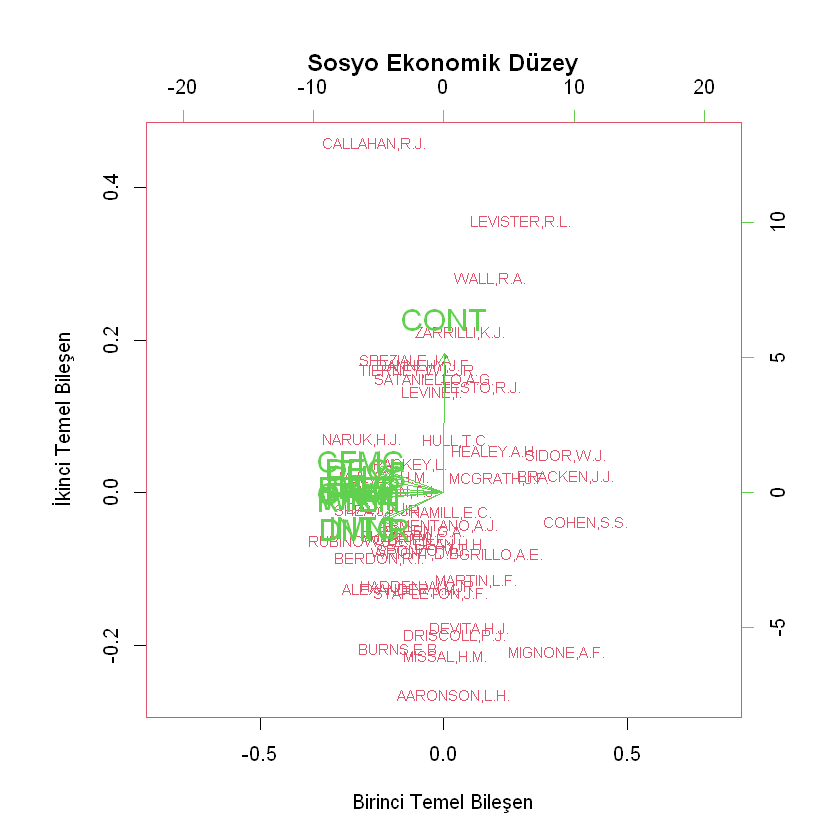

In [23]:
# Biplot çizimi
biplot(x_pca, col = c(2, 3), cex = c(0.75, 1.5),
       xlim = c(-0.75, 0.75),
       xlab = "Birinci Temel Bileşen",
       ylab = "İkinci Temel Bileşen",
       main = "Sosyo Ekonomik Düzey")

# Değişken isimlerini etiketleme
text(x_pca$loadings[, 1], x_pca$loadings[, 2], labels = colnames(z), pos = 4, col = "green")

# PNG olarak kaydetme
png("biplot_with_labels.png", width = 800, height = 800, units = "px", res = 100)
biplot(x_pca, col = c(2, 3), cex = c(0.75, 1.5),
       xlim = c(-0.75, 0.75),
       xlab = "Birinci Temel Bileşen",
       ylab = "İkinci Temel Bileşen",
       main = "Sosyo Ekonomik Düzey")

# Kırmızı metinleri etiketleme (sadece yeşil metinler gösterilsin)
text(x_pca$loadings[, 1], x_pca$loadings[, 2], labels = colnames(z), pos = 4, col = "red", cex = 0)
dev.off()


Aykırı Değerlerin İndeksleri (Temel Bileşen 1): 
COHEN,S.S.

Aykırı Değerlerin İndeksleri (Temel Bileşen 2): 
CALLAHAN,R.J.
LEVISTER,R.L.


png 
  6

png 
  2

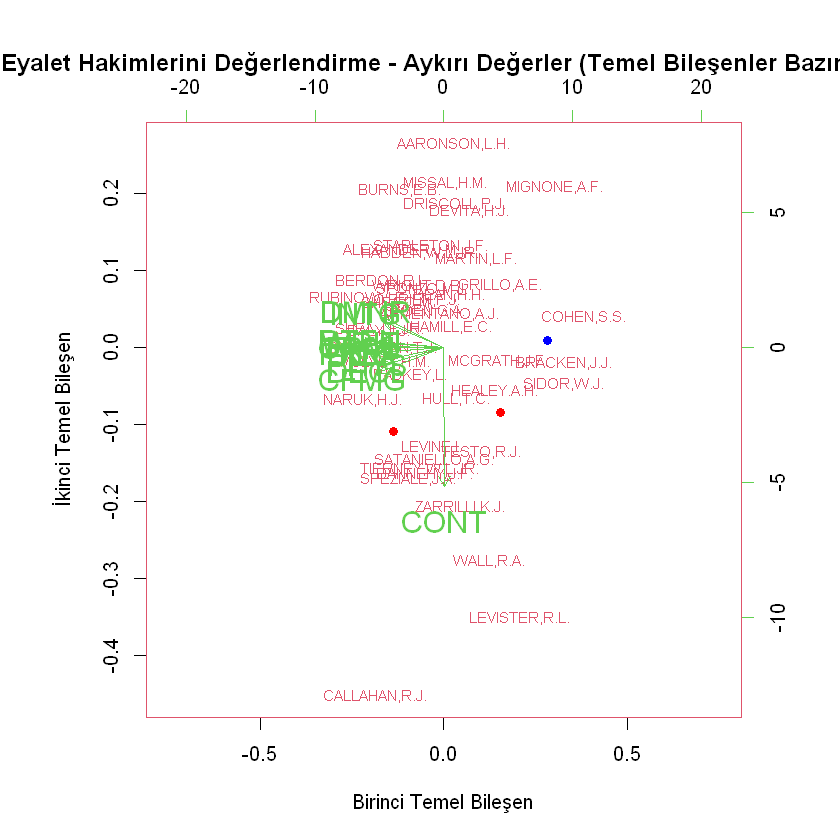

In [69]:
# Aykırı değerleri belirlemek için bir fonksiyon
identify_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR_val <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_val
  upper_bound <- Q3 + 1.5 * IQR_val
  return(x < lower_bound | x > upper_bound)
}

# Her bir sütun için aykırı değerleri belirle
outliers_by_column <- apply(USJudgeRatings, 2, identify_outliers)

# PCA analizi yap
pca_result <- prcomp(USJudgeRatings, scale. = TRUE)

# Temel bileşenler üzerinde aykırı değerleri belirle
outliers_pca <- apply(pca_result$x, 2, identify_outliers)

# Aykırı değerleri içeren biplot (temel bileşenler bazında)
biplot(pca_result, col = c(2, 3), cex = c(0.75, 1.5),
       xlim = c(-0.75, 0.75),
       xlab = "Birinci Temel Bileşen",
       ylab = "İkinci Temel Bileşen",
       main = "Eyalet Hakimlerini Değerlendirme - Aykırı Değerler (Temel Bileşenler Bazında)")

# Belirli indekslere sahip olan aykırı değerleri temel bileşenler bazında biplot üzerinde gösterme
selected_outliers_pc1 <- rownames(outliers_df_pca_with_labels)[rowSums(outliers_df_pca) > 0 & outliers_df_pca$PC1]
selected_outliers_pc2 <- rownames(outliers_df_pca_with_labels)[rowSums(outliers_df_pca) > 0 & outliers_df_pca$PC2]

points(pca_result$x[selected_outliers_pc1, 1], pca_result$x[selected_outliers_pc1, 2], col = "blue", pch = 16)
points(pca_result$x[selected_outliers_pc2, 1], pca_result$x[selected_outliers_pc2, 2], col = "red", pch = 16)

# Her bir temel bileşen için outlier indekslerini yazdır
cat("Aykırı Değerlerin İndeksleri (Temel Bileşen 1):", "\n")
cat(selected_outliers_pc1, sep = "\n")

cat("\nAykırı Değerlerin İndeksleri (Temel Bileşen 2):", "\n")
cat(selected_outliers_pc2, sep = "\n")

# Biplot'ı "biplot_eyalette.png" adlı bir dosyaya kaydetme
dev.copy(png, "biplot_eyalette.png", width = 1920, height = 1080)
dev.off()


In [57]:
# Grafik cihazını oluştur ve boyutlarını belirle
png("biplot.png", width = 1920, height = 1080)

# Aykırı değerleri içeren biplot (sütun bazında)
biplot(pca_result, col = c(2, 3), cex = c(0.75, 1.5),
       xlim = c(-0.75, 0.75),
       xlab = "Birinci Temel Bileşen",
       ylab = "İkinci Temel Bileşen",
       main = "Eyalet Hakimleri İçin Değerlendirme - Aykırı Değerler (Sütun Bazında)")

# Aykırı değerleri içeren biplot (temel bileşenler bazında)
biplot(pca_result, col = c(2, 3), cex = c(0.75, 1.5),
       xlim = c(-0.75, 0.75),
       xlab = "Birinci Temel Bileşen",
       ylab = "İkinci Temel Bileşen",
       main = "Eyalet Hakimleri İçin Değerlendirme - Aykırı Değerler (Temel Bileşenler Bazında)")

# Aykırı değerleri sütun bazında biplot üzerinde gösterme
points(outliers_data_by_column$Outlier_PC1, outliers_data_by_column$Outlier_PC2, col = "blue", pch = 16)

# Aykırı değerleri temel bileşenler bazında biplot üzerinde gösterme
points(outliers_data_pca$Outlier_PC1, outliers_data_pca$Outlier_PC2, col = "red", pch = 16)

# Grafik cihazını kapat
dev.off()


png 
  2

h)

In [46]:
# 1. Temel Bileşen için sütunlara oransal katkılar ve isimleri
contribution_pc1 <- data.frame(Column = colnames(pca_result$rotation), Contribution = (pca_result$rotation[, 1]^2) / sum(pca_result$rotation[, 1]^2) * 100)

# 2. Temel Bileşen için sütunlara oransal katkılar ve isimleri
contribution_pc2 <- data.frame(Column = colnames(pca_result$rotation), Contribution = (pca_result$rotation[, 2]^2) / sum(pca_result$rotation[, 2]^2) * 100)

# Sonuçları yazdırma
cat("1. Temel Bileşen için Sütunlara Oransal Katkılar (%):\n")
print(contribution_pc1)

cat("\n2. Temel Bileşen için Sütunlara Oransal Katkılar (%):\n")
print(contribution_pc2)


1. Temel Bileşen için Sütunlara Oransal Katkılar (%):
     Column Contribution
CONT    PC1 0.0009456506
INTG    PC2 8.3261549878
DMNR    PC3 8.2302547769
DILG    PC4 9.2631412799
CFMG    PC5 9.1550258775
DECI    PC6 9.1138760690
PREP    PC7 9.5732349084
FAMI    PC8 9.4052331994
ORAL    PC9 9.7786510740
WRIT   PC10 9.6759089510
PHYS   PC11 7.8805753269
RTEN   PC12 9.5969978987

2. Temel Bileşen için Sütunlara Oransal Katkılar (%):
     Column Contribution
CONT    PC1 8.702850e+01
INTG    PC2 3.313892e+00
DMNR    PC3 3.903222e+00
DILG    PC4 1.318029e-01
CFMG    PC5 2.835638e+00
DECI    PC6 1.635260e+00
PREP    PC7 1.038789e-01
FAMI    PC8 1.729706e-04
ORAL    PC9 1.314585e-03
WRIT   PC10 9.846263e-02
PHYS   PC11 7.927712e-01
RTEN   PC12 1.550887e-01


In [71]:
# 1. Temel Bileşen için sütunlara oransal katkılar ve isimleri
contribution_pc1 <- data.frame(Column = colnames(pca_result$rotation), Contribution = round((pca_result$rotation[, 1]^2) / sum(pca_result$rotation[, 1]^2) * 100, 1))
contribution_pc1 <- contribution_pc1[order(-contribution_pc1$Contribution), ]

# 2. Temel Bileşen için sütunlara oransal katkılar ve isimleri
contribution_pc2 <- data.frame(Column = colnames(pca_result$rotation), Contribution = round((pca_result$rotation[, 2]^2) / sum(pca_result$rotation[, 2]^2) * 100, 1))
contribution_pc2 <- contribution_pc2[order(-contribution_pc2$Contribution), ]

# Sonuçları yazdırma
cat("1. Temel Bileşen için Sütunlara Oransal Katkılar (%):\n")
print(contribution_pc1)

cat("\n2. Temel Bileşen için Sütunlara Oransal Katkılar (%):\n")
print(contribution_pc2)


1. Temel Bileşen için Sütunlara Oransal Katkılar (%):
     Column Contribution
ORAL    PC9          9.8
WRIT   PC10          9.7
PREP    PC7          9.6
RTEN   PC12          9.6
FAMI    PC8          9.4
DILG    PC4          9.3
CFMG    PC5          9.2
DECI    PC6          9.1
INTG    PC2          8.3
DMNR    PC3          8.2
PHYS   PC11          7.9
CONT    PC1          0.0

2. Temel Bileşen için Sütunlara Oransal Katkılar (%):
     Column Contribution
CONT    PC1         87.0
DMNR    PC3          3.9
INTG    PC2          3.3
CFMG    PC5          2.8
DECI    PC6          1.6
PHYS   PC11          0.8
RTEN   PC12          0.2
DILG    PC4          0.1
PREP    PC7          0.1
WRIT   PC10          0.1
FAMI    PC8          0.0
ORAL    PC9          0.0


In [84]:
# Sutunların Temel Bileşenlerle Korelasyonlarını Hesapla
correlation_df <- data.frame(Column = colnames(pca_result$x),
                              PC1 = pca_result$rotation[, 1],
                              PC2 = pca_result$rotation[, 2])

# Korelasyonları Daha İyi Göstermek İçin Yuvarla
correlation_df$PC1 <- round(correlation_df$PC1, 2)
correlation_df$PC2 <- round(correlation_df$PC2, 2)

# Korelasyon Veri Çerçevesini Yazdır
cat("Korelasyon\n")
print(correlation_df)


Korelasyon
     Column   PC1   PC2
CONT    PC1  0.00 -0.93
INTG    PC2 -0.29  0.18
DMNR    PC3 -0.29  0.20
DILG    PC4 -0.30 -0.04
CFMG    PC5 -0.30 -0.17
DECI    PC6 -0.30 -0.13
PREP    PC7 -0.31 -0.03
FAMI    PC8 -0.31  0.00
ORAL    PC9 -0.31  0.00
WRIT   PC10 -0.31  0.03
PHYS   PC11 -0.28 -0.09
RTEN   PC12 -0.31  0.04


In [86]:
# Sutunların Temel Bileşenlerle Korelasyonlarını Hesapla
correlation_df <- data.frame(Column = rownames(correlation_df),
                              PC1 = correlation_df$PC1,
                              PC2 = correlation_df$PC2)

# Korelasyonları Daha İyi Göstermek İçin Yuvarla
correlation_df$PC1 <- round(correlation_df$PC1, 2)
correlation_df$PC2 <- round(correlation_df$PC2, 2)

# Korelasyon Veri Çerçevesini Yazdır
cat("Korelasyon\n")
print(correlation_df, row.names = FALSE)


Korelasyon
 Column   PC1   PC2
   CONT  0.00 -0.93
   INTG -0.29  0.18
   DMNR -0.29  0.20
   DILG -0.30 -0.04
   CFMG -0.30 -0.17
   DECI -0.30 -0.13
   PREP -0.31 -0.03
   FAMI -0.31  0.00
   ORAL -0.31  0.00
   WRIT -0.31  0.03
   PHYS -0.28 -0.09
   RTEN -0.31  0.04


h)

In [114]:
# TBA Fonksiyonu
TBA <- function(veri_matrisi, guven_duzeyi = 0.95) {
  
  # Veriyi Standartlaştır
  standart_veri <- scale(veri_matrisi)
  
  # Temel Bileşen Analizi
  pca_result <- prcomp(standart_veri, scale. = TRUE)
  
  # Temel Bileşen Analizi Sonuçları
  cat("Temel Bileşen Analizi Sonuçları:\n")
  print(summary(pca_result))
  
  # Kovaryans Matrisi
  cat("\nStandartlaştırılmış Veri Kovaryans Matrisi:\n")
  print(cov(standart_veri))
  
  # Bartlett Testi
  bartlett_test_sonuc <- tryCatch({
    bartlett.test(standart_veri)
  }, error = function(e) e)
  
  # Bartlett Testi Başarılı mı?
  if (inherits(bartlett_test_sonuc, "error")) {
    cat("\nBartlett Testi Başarısız Oldu. Değişkenlerin varyanslarını kontrol ediniz.\n")
    cat("Bartlett Testi Hata Mesajı:", bartlett_test_sonuc$message, "\n")
  } else {
    cat("\nBartlett Testi Başarılı.\n")
  }
  
  # Uygun Temel Bileşen Sayısını Belirleme (Kaiser-Guttman Kriteri)
  uygun_bilesenler <- pca_result$sdev^2 > 1
  uygun_bilesen_sayisi <- sum(uygun_bilesenler)
  cat("\nUygun Temel Bileşen Sayısı (Kaiser-Guttman Kriteri):", uygun_bilesen_sayisi, "\n")
  
  # Temel Bileşen Analizine Uygunluk
  uygunluk_kontrol <- any(uygun_bilesen_sayisi > 0)
  if (uygunluk_kontrol) {
    cat("\nTemel Bileşen Analizine Uygun.\n")
    
    # Temel Bileşenlerin Varyansları
    cat("\nTemel Bileşenlerin Varyansları:\n")
    print(pca_result$sdev^2)
    
    # Uygunluk Gerekçesi
    cat("\nUygunluk Gerekçesi: En az bir temel bileşenin varyansı 1'den büyük olmalıdır.\n")
    
  } else {
    cat("\nTemel Bileşen Analizine Uygun Değil.\n")
  }
  
  # İndirgenmiş Veri Matrisi
  indirgenmis_veri <- as.data.frame(pca_result$x[, uygun_bilesenler])
  cat("\nİndirgenmiş Veri Matrisi:\n")
  print(indirgenmis_veri)
  
  # Temel Bileşen Seçimi ve Nedeni
  cat("\nTemel Bileşen Seçimi ve Nedeni:\n")
  if (uygun_bilesen_sayisi > 0) {
    cat("Kaiser-Guttman Kriteri: En az bir temel bileşenin varyansı 1'den büyük olduğu için seçildi.\n")
    cat("Seçilen Temel Bileşenlerin Sayısı:", uygun_bilesen_sayisi, "\n")
  } else {
    cat("Kaiser-Guttman Kriteri: Uygun temel bileşen bulunamadı. Tüm bileşenler kullanıldı.\n")
  }
  
  # Sonuçları Döndür
  return(list(pca_result = pca_result,
              uygun_bilesen_sayisi = uygun_bilesen_sayisi,
              indirgenmis_veri = indirgenmis_veri,
              uygunluk_kontrol = uygunluk_kontrol))
}

# Fonksiyonu Kullanarak Analiz Yapma
veri_seti <- USJudgeRatings
sonuclar <- TBA(veri_seti)

# Analiz Sonuçlarını ve Kararları Yazdırma
cat("\nTBA Analiz Sonuçları ve Kararlar:\n")
print(sonuclar)


Temel Bileşen Analizi Sonuçları:
Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1833 1.05078 0.57698 0.50383 0.29061 0.19310 0.14030
Proportion of Variance 0.8445 0.09201 0.02774 0.02115 0.00704 0.00311 0.00164
Cumulative Proportion  0.8445 0.93647 0.96421 0.98537 0.99240 0.99551 0.99715
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.12416 0.08851 0.07491 0.05708 0.04539
Proportion of Variance 0.00128 0.00065 0.00047 0.00027 0.00017
Cumulative Proportion  0.99844 0.99909 0.99956 0.99983 1.00000

Standartlaştırılmış Veri Kovaryans Matrisi:
            CONT       INTG       DMNR      DILG      CFMG       DECI
CONT  1.00000000 -0.1331909 -0.1536885 0.0123920 0.1369123 0.08653823
INTG -0.13319089  1.0000000  0.9646153 0.8715111 0.8140858 0.80284636
DMNR -0.15368853  0.9646153  1.0000000 0.8368510 0.8133582 0.80411683
DILG  0.01239200  0.8715111  0.8368510 1.0000000 0.9

In [3]:
# Bilimsel gösterimi kapatarak tam ondalık gösterim
options(scipen = 999)

# (b) Sorusu: Santrale gelen 150 telefondan 10'unun yanlış numara olma olasılığı
k_b <- 10
olasilik_b <- dbinom(k_b, n, p)
cat('(b) Santrale gelen 150 telefondan 10\'unun yanlış numara olma olasılığı:', olasilik_b, '\n')

# (c) Sorusu: Santrale gelen 150 telefondan en az iki tanesinin yanlış numara olma olasılığı
k_c <- 2:n  # En az iki tanesi yanlış olan durumları hesaplamak için
olasilik_c <- 1 - sum(dbinom(k_c - 1, n, p))
cat('(c) Santrale gelen 150 telefondan en az iki tanesinin yanlış numara olma olasılığı:', olasilik_c, '\n')


(b) Santrale gelen 150 telefondan 10'unun yanlış numara olma olasılığı: 0.00004699686 
(c) Santrale gelen 150 telefondan en az iki tanesinin yanlış numara olma olasılığı: 0.1206528 
